(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week04/notebook/demo.ipynb)

# Softmax regression vs. Logistic Regression

Last week, we talked about an example of using softmax regression to recognize handwritten digits. The softmax regression algorithm could essentially be expressed as

$$
\begin{aligned}
\hat{y} = \text{softmax}(\mathbf{X} \cdot \theta) = \frac{\exp(\mathbf{X} \cdot \theta)}{\sum_{i=1}^{C} \exp(\mathbf{X}_i \cdot \theta)}
\end{aligned}
$$

Where:
- $X$ is the input training data matrix (shape $(N,D)$), where $N$ is the number of samples in the training batch and $D$ is the number of features.
- $\theta$ is the weight matrix (shape $(D,C)$), where $C$ is the number of classes.
- $\hat{y}$ is the predicted probability distribution over the classes (shape $(N,C)$).


In case $C=2$, we can simplify the softmax regression to logistic regression, which is a special case of softmax regression. The logistic regression algorithm could be expressed as
$$
\begin{aligned}
\hat{y} = \text{sigmoid}(\mathbf{X} \cdot \theta) = \frac{1}{1 + \exp(-\mathbf{X} \cdot \theta)}
\end{aligned}
$$

So the same set of model architecture, loss function, and optimization algorithm can be used for both softmax regression and logistic regression. We will have one question covering the implementation of logistic regression algorithm in the homework assignment.


## Decision boundary of Logistic Regression

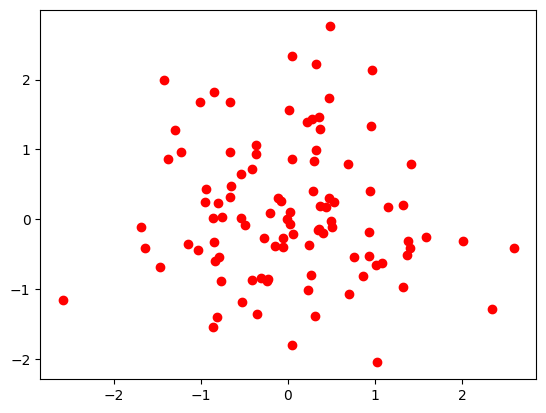

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=100)
plt.plot(X[:,0], X[:,1], 'ro')
plt.show()

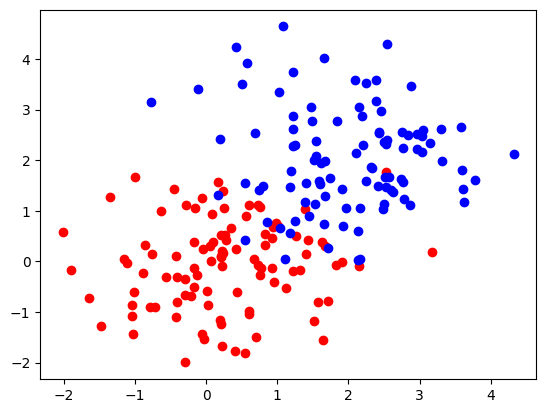

In [16]:
X0 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=100)
# Class 1: centered at (2, 2)
X1 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0], [0, 1]], size=100)

plt.plot(X0[:, 0], X0[:, 1], 'ro', label='Class 0')
plt.plot(X1[:, 0], X1[:, 1], 'bo', label='Class 1')
plt.show()

In [17]:
# Set a random seed for reproducibility
np.random.seed(0)

# Generate synthetic data for two classes
# Class 0: centered at (0, 0)
X0 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=100)
# Class 1: centered at (2, 2)
X1 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0], [0, 1]], size=100)

# Combine the data
X = np.vstack((X0, X1))
y = np.array([0]*100 + [1]*100)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (200, 2)
Shape of y: (200,)


`scikit-learn` documentation on Logistic Regression implementation
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [25]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model
clf = LogisticRegression()
clf.fit(X, y)
print(f"Predicted labels: {clf.predict(X[:5, :])}")
print(f"True labels: {y[:5]}")
print(f"Predicted probabilities: {clf.predict_proba(X[:5, :])}")

Predicted labels: [1 1 0 0 0]
True labels: [0 0 0 0 0]
Predicted probabilities: [[0.43036082 0.56963918]
 [0.11397989 0.88602011]
 [0.8624479  0.1375521 ]
 [0.87709079 0.12290921]
 [0.94016981 0.05983019]]


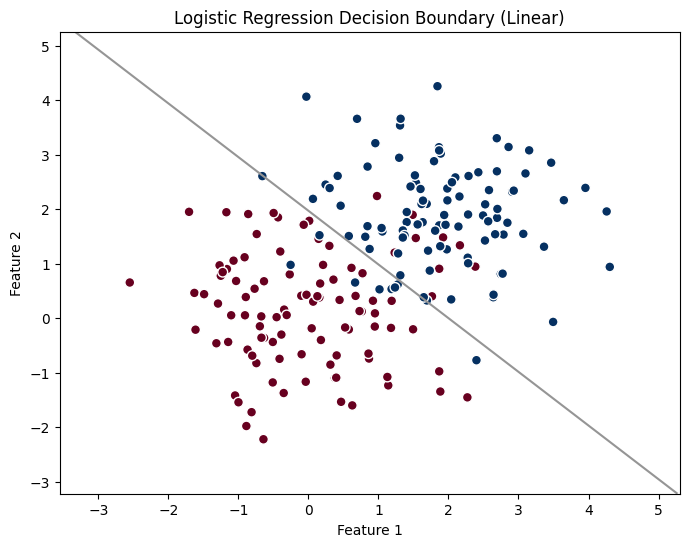

In [28]:


# Create a mesh grid to evaluate the model's predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for each point on the grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot the decision boundary (where probability == 0.5)
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolor="white", s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary (Linear)")
plt.show()


# Decision Tree Model

## Example - Classifier for Iris Flowers [Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

![](https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## import the dataset
iris = load_iris()

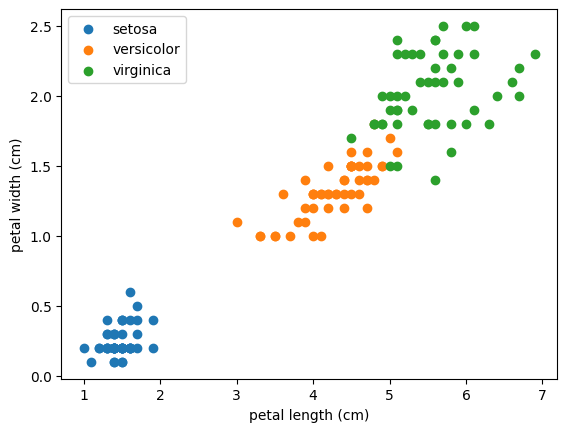

In [4]:
## visualize the data

plt.scatter(iris['data'][iris.target==0,2],iris['data'][iris.target==0,3], label='setosa')
plt.scatter(iris['data'][iris.target==1,2],iris['data'][iris.target==1,3], label='versicolor')
plt.scatter(iris['data'][iris.target==2,2],iris['data'][iris.target==2,3], label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [5]:
## fit a decision tree model

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
%%sh

pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [7]:
## visualize the tree

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='../pics/iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

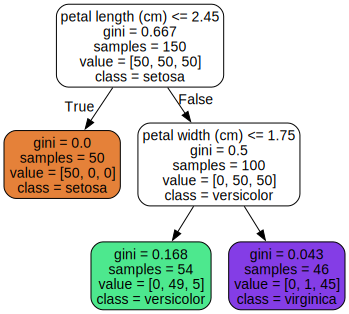

In [8]:
Source.from_file('../pics/iris_tree.dot')